# 使用PCA核方法对糖尿病数据集降维

**案例描述**

提前预测是否患有糖尿病对个人生活有至关重要的影响。现有皮马印第安人过去五年内是否患有糖尿病的数据。首先使用PCA对糖尿病数据集做降维。对比是否使用PCA核方法对糖尿病数据集做降维后模型性能的差别。

**字段解释**

preg：数值类型；怀孕次数

plas：数值类型；口服葡萄糖耐量测试中2小时的血浆葡萄糖浓度

pres：数值类型；血压

skin：数值类型；皮肤厚度

test：数值类型；胰岛素

mass：数值类型；体重指数

pedi：数值类型；糖尿病谱系功能

age：数值类型；年龄

class：字符串类型；测试结果；有2个值，1：有糖尿病；0：没有糖尿病


In [23]:
#导入包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
# 导入数据
data = pd.read_csv("./data/pima-indians-diabetes.csv")
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


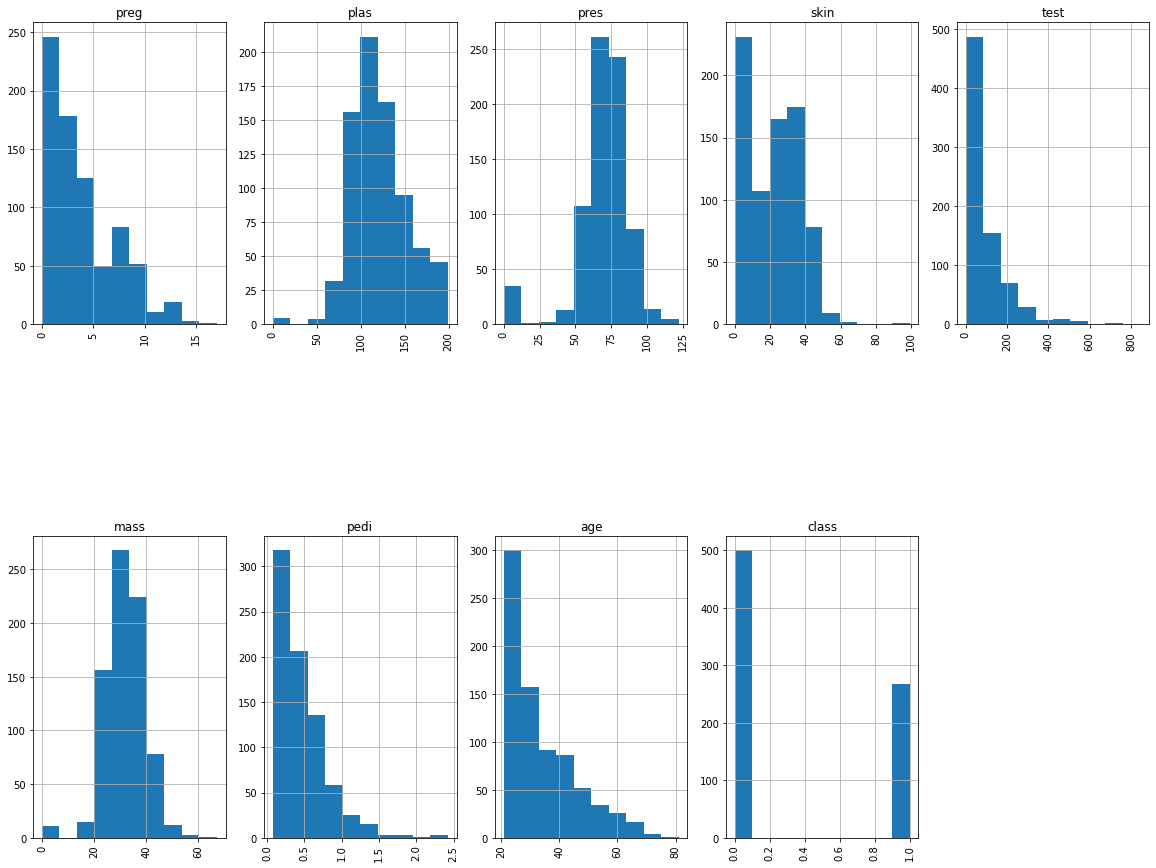

In [25]:
# 绘制各字段的直方图
def plot_histogram(my_dataframe, cols = 5):
    import math
    rows = math.ceil(float(my_dataframe.shape[1]) / cols)
    fig = plt.figure(figsize=(20,15))
    for i, column in enumerate(my_dataframe.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if my_dataframe.dtypes[column] == np.object: # 类别属性
            my_dataframe[column].value_counts().plot(kind="bar", axes=ax)# 统计各种类数量
        else: # 值属性
            my_dataframe[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
plot_histogram(data)

In [26]:
#统计缺失数据
def calcNull(data):
    nullSum=data.isnull().sum()
    nullSum=nullSum.drop(nullSum[nullSum.values==0].index)
    return nullSum
missing_data=calcNull(data)
missing_data

Series([], dtype: int64)

<AxesSubplot:>

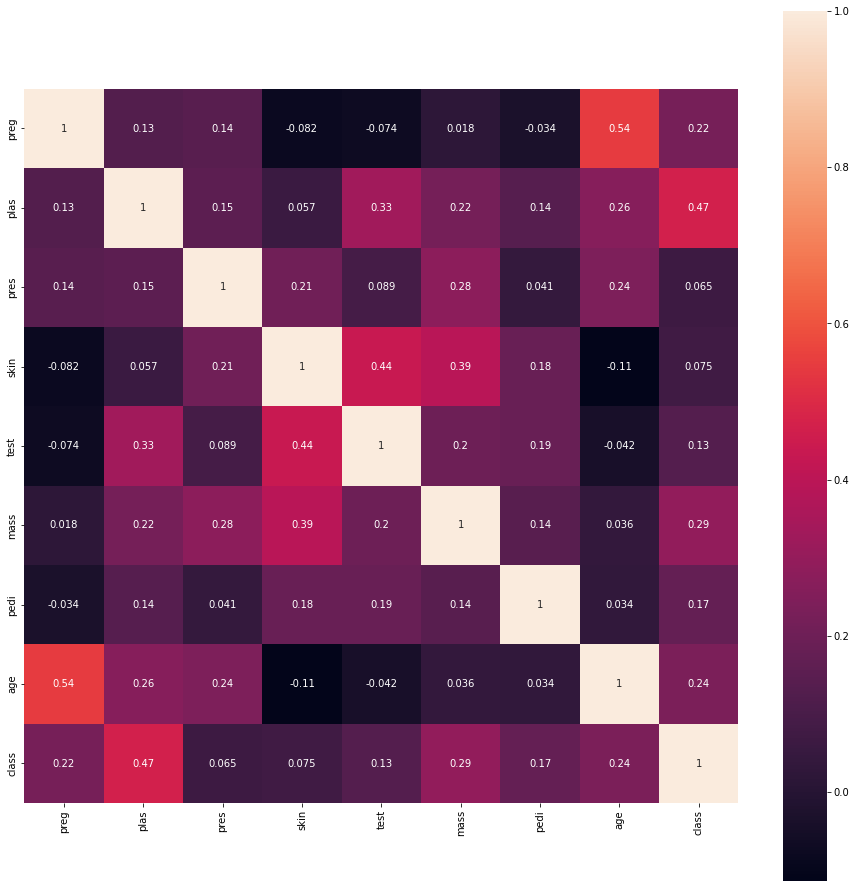

In [27]:
#绘制热力图
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(16,16))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(corr, vmax=1.0, square=True,annot=True)
# 各个变量都较为独立

In [28]:
#查看类别变量的各个种类值
def show_labels(data):
    print("-"*10+"show lables"+"-"*10)
    for i, column in enumerate(data.columns):
        if data.dtypes[column]==np.object:
            print("\n---"+column+"---\n")
            print(data[column].value_counts())
    print("*"*10+"show lables"+"*"*10)
show_labels(data)

----------show lables----------
**********show lables**********


In [29]:
#分离自变量和因变量
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
print(X,Y)

     preg  plas  pres  skin  test  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [36]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (614, 8)
x_test (154, 8)
y_train (614,)
y_test (154,)


In [37]:
# 特征缩放
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [87]:
#PCA降维
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =3,kernel="rbf")
x_train_pca = pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

(614, 3) (154, 3)


In [88]:
##逻辑回归模型
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( class_weight='balanced')

In [89]:
#使用原始数据集进行预测
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0]
0.7207792207792207


In [90]:
#使用降维数据集进行预测
lr.fit(x_train_pca,y_train)
y_pred_pca=lr.predict(x_test_pca)
print(y_pred_pca)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pca))

[1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 1]
0.6363636363636364


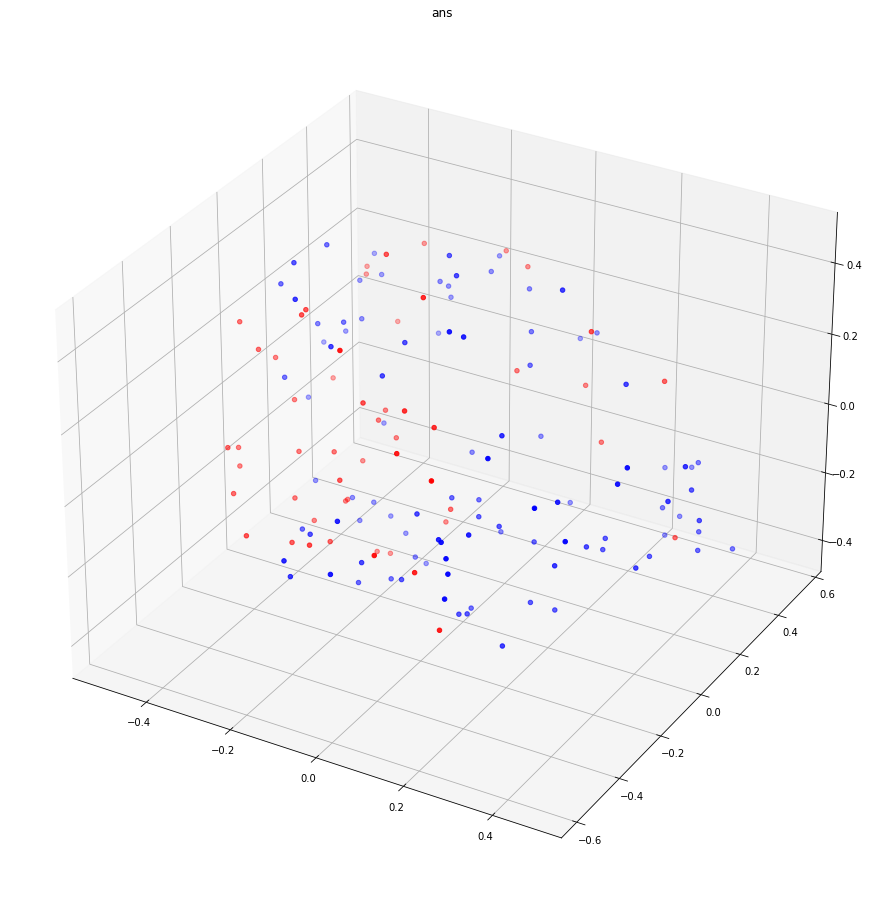

In [94]:
#可视化降维结果
plt.figure(figsize=(16,16))
ax = plt.subplot( projection='3d')  # 创建一个三维的绘图工程
ax.set_title('ans')  # 设置本图名称
ax.scatter(x_test_pca[y_test==0,0],x_test_pca[y_test==0,1],x_test_pca[y_test==0,2],c="blue")
ax.scatter(x_test_pca[y_test==1,0],x_test_pca[y_test==1,1],x_test_pca[y_test==1,2],c="red")
plt.show()

In [116]:
# 更换核函数再次尝试降维
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =1,kernel="cosine")
x_train_pca = pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

#使用降维数据集进行预测
lr.fit(x_train_pca,y_train)
y_pred_pca=lr.predict(x_test_pca)
print(y_pred_pca)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pca))

(614, 1) (154, 1)
[1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 1 1]
0.6883116883116883


In [123]:
#使用网格搜索进行优化
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
clf =Pipeline([
("kpca",KernelPCA()),
("log_reg",LogisticRegression())
])
param_grid =[{
"kpca__kernel":["rbf","sigmoid"],
"kpca__n_components":[2,3,4,5,6,7]
}]
grid_search =GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'kpca__kernel': 'sigmoid', 'kpca__n_components': 6}


In [124]:
# 更换核函数再次尝试降维
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =6,kernel="sigmoid")
x_train_pca = pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

#使用降维数据集进行预测
lr.fit(x_train_pca,y_train)
y_pred_pca=lr.predict(x_test_pca)
print(y_pred_pca)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pca))

(614, 6) (154, 6)
[1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 0]
0.7272727272727273
